In [6]:
from filterpy.kalman import UnscentedKalmanFilter, MerweScaledSigmaPoints
from filterpy.common import Q_discrete_white_noise

from scripts import dt_sim, dt_pred, dt_meas
import numpy as np

In [8]:
from dgsp.functions import *

In [7]:
meas = np.load('../data/meas/0.npy')

In [9]:
def fx(x, dt):
    return transition(x) * dt + x

In [10]:
def hx(x):
    return measurement(x)

In [11]:
points = MerweScaledSigmaPoints(4, alpha=0.1, beta =2.0, kappa=-1.0)

In [12]:
kf = UnscentedKalmanFilter(dim_x=4, dim_z=2, dt=dt_pred, fx=fx, hx=hx, points=points)
kf.x = initial
kf.P *= 0.2

kf.R = R 
kf.Q = Q

In [13]:
pred_step = int(dt_pred / dt_sim)
correct_step = int(dt_meas / dt_sim)

In [14]:
state_pred = []

In [15]:
for i in range(0, len(meas), pred_step):
    kf.predict()
    if i % correct_step == 0:
        kf.update(meas[i])
    state_pred.append(kf.x)

In [18]:
state_pred = np.array(state_pred)

In [16]:
traj = np.load('../data/traj/0.npy')

In [17]:
from scripts import T_MAX

In [21]:
import matplotlib.pyplot as plt

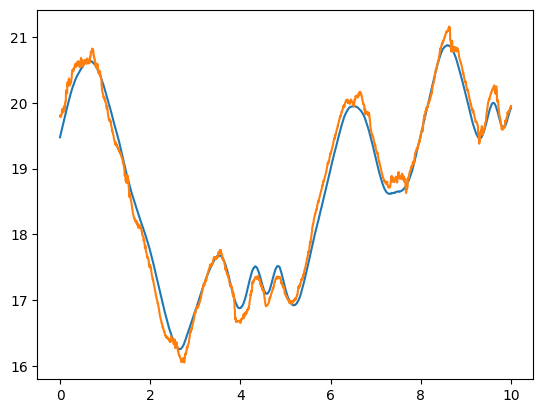

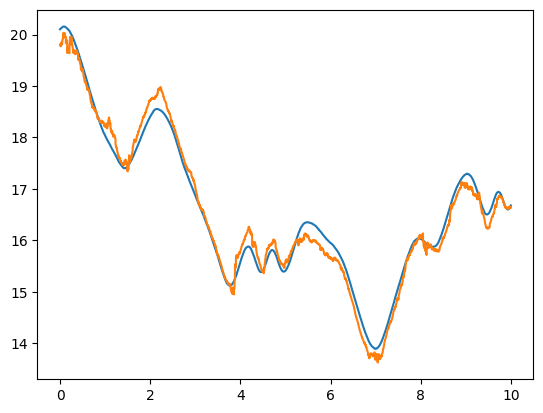

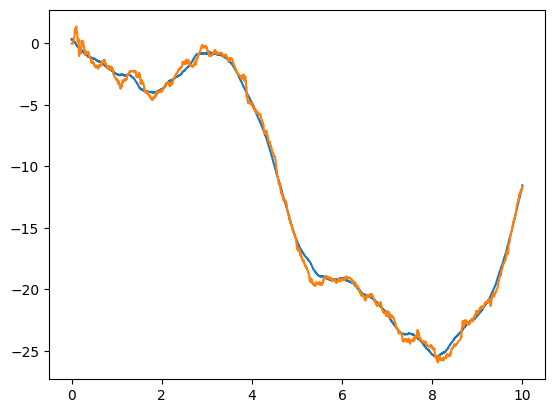

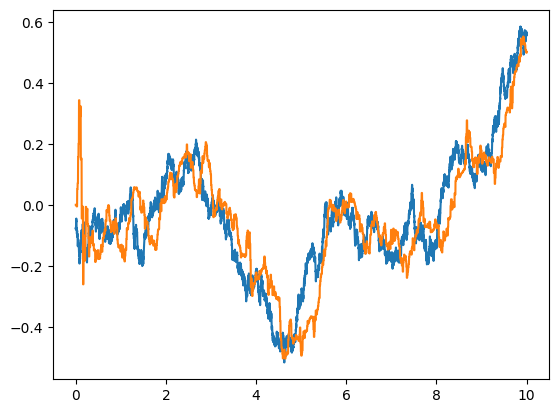

In [24]:
for i in range(4):
    x_traj = traj[:, i]
    t_traj = np.linspace(0, T_MAX, len(x_traj))
    
    x_pred = state_pred[:, i]
    t_pred = np.linspace(0, T_MAX, len(x_pred))
    
    plt.plot(t_traj, x_traj)
    plt.plot(t_pred, x_pred)    
    plt.show()